In [14]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [15]:
spark = SparkSession.builder.master('local[2]').appName("Sunny").getOrCreate()

spark

In [16]:
data = spark.read.csv('kc_house_data.csv', inferSchema = True, header = True)

In [17]:
data.show()

+----------+---------------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|           date|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+---------------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|20141013T000000| 221900|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192|20141209T000000| 538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    1951

# Exploratory Data Analysis on Given Data

In [18]:
data.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



In [19]:
data.describe().show()

+-------+--------------------+---------------+------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+
|summary|                  id|           date|             price|         bedrooms|         bathrooms|       sqft_living|          sqft_lot|            floors|          waterfront|               view|         condition|             grade|        sqft_above|     sqft_basement|          yr_built|      yr_renovated|           zipcode|                lat|               long|    sqft_living15|        sqft_lot15|
+-------+--------------------+---------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------

In [20]:
print("DIm of Table is : ", (data.count(), len(data.columns)))

DIm of Table is :  (21613, 21)


In [21]:
pd_df = data.toPandas()

In [22]:
pd_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  object 
 3   bedrooms       21613 non-null  int32  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int32  
 6   sqft_lot       21613 non-null  int32  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int32  
 9   view           21613 non-null  int32  
 10  condition      21613 non-null  int32  
 11  grade          21613 non-null  int32  
 12  sqft_above     21613 non-null  int32  
 13  sqft_basement  21613 non-null  int32  
 14  yr_built       21613 non-null  int32  
 15  yr_renovated   21613 non-null  int32  
 16  zipcode        21613 non-null  int32  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
# checking for missing  values
df2 = data.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in data.columns])
df2.show()

+---+----+-----+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+---+----+-------------+----------+
| id|date|price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|lat|long|sqft_living15|sqft_lot15|
+---+----+-----+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+---+----+-------------+----------+
|  0|   0|    0|       0|        0|          0|       0|     0|         0|   0|        0|    0|         0|            0|       0|           0|      0|  0|   0|            0|         0|
+---+----+-----+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+---+----+-------------+----------+



In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

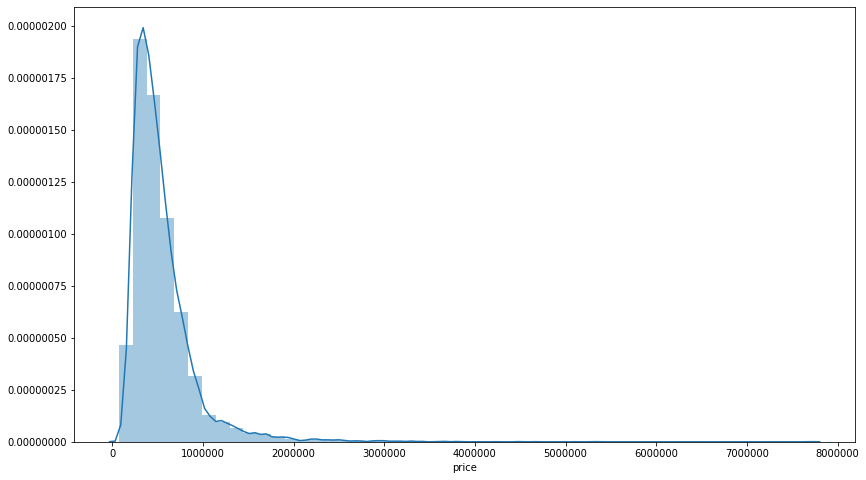

In [42]:
plt.rcParams['figure.figsize'] = (14,8)
sns.distplot(pd.to_numeric(pd_df['price']))   # actual price

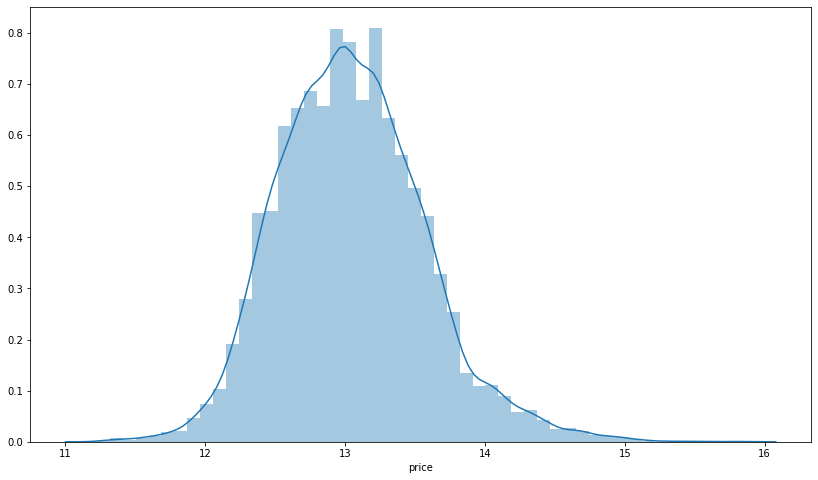

In [44]:
sns.distplot(np.log(pd.to_numeric(pd_df['price'])))  # log_price

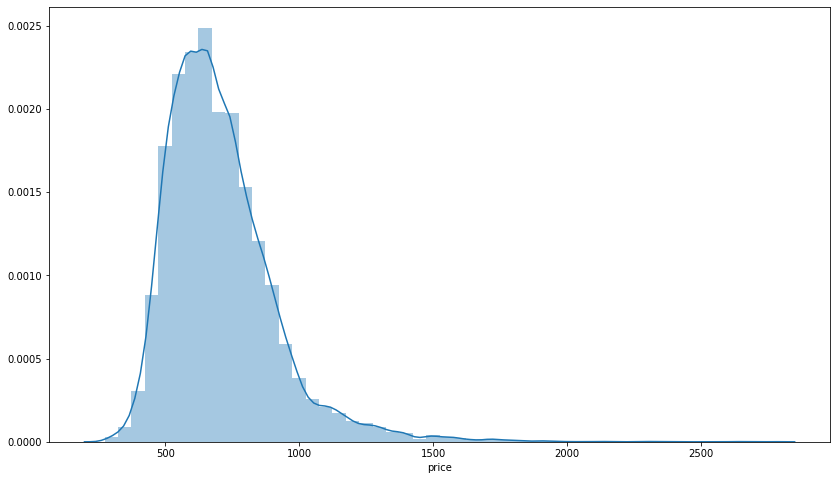

In [47]:
sns.distplot(np.sqrt(pd.to_numeric(pd_df['price'])))  # squareroot price

In [55]:
pd.DataFrame(pd_df.corrwith(pd.to_numeric(pd_df['price'])), columns = ['Correlation with actual Price'])  # correlation actual price

,Correlation with actual Price
id,-0.016762
bedrooms,0.308350
bathrooms,0.525138
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
condition,0.036362
grade,0.667434


In [56]:
pd.DataFrame(pd_df.corrwith(np.log(pd.to_numeric(pd_df['price']))), columns = ['Correlation with log Price'])  # correlation log price

,Correlation with log Price
id,-0.003819
bedrooms,0.343561
bathrooms,0.550802
sqft_living,0.695341
sqft_lot,0.099622
floors,0.310558
waterfront,0.174586
view,0.346522
condition,0.039558
grade,0.703634


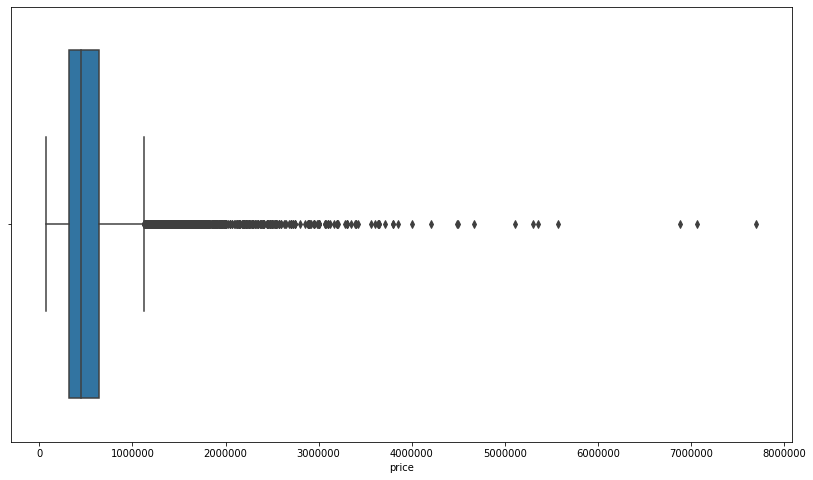

In [57]:
sns.boxplot(pd.to_numeric(pd_df['price']))

In [58]:
pd_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [60]:
pd_df['log_price'] = np.log(pd.to_numeric(pd_df['price']))

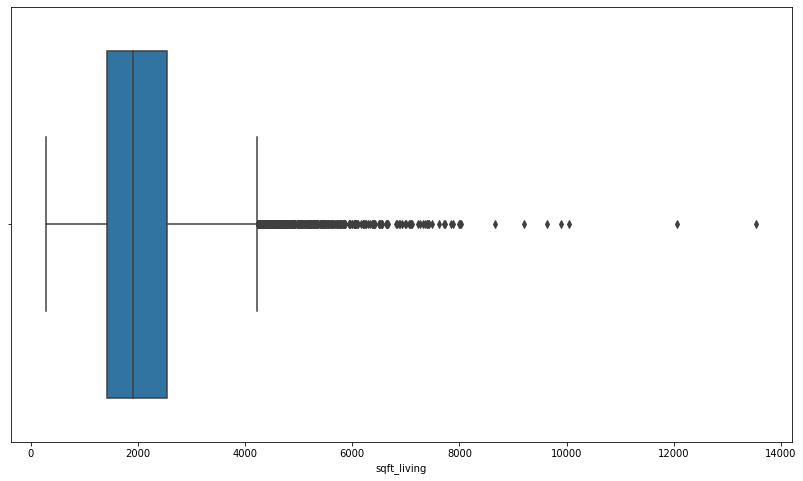

In [61]:
sns.boxplot(pd_df['sqft_living'])

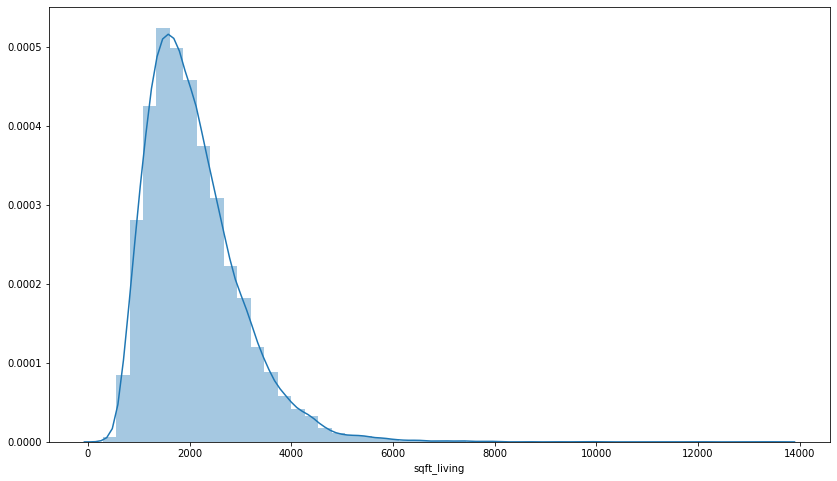

In [62]:
sns.distplot(pd_df['sqft_living'])

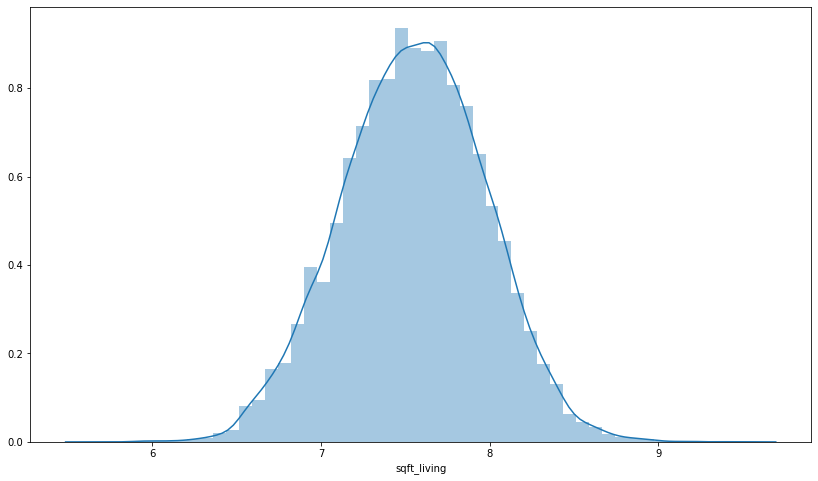

In [63]:
sns.distplot(np.log(pd_df['sqft_living']))

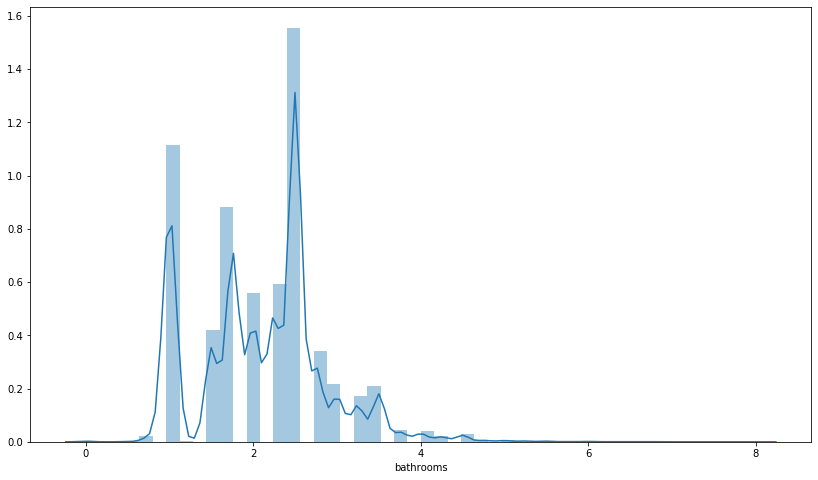

In [64]:
sns.distplot(pd_df['bathrooms'])

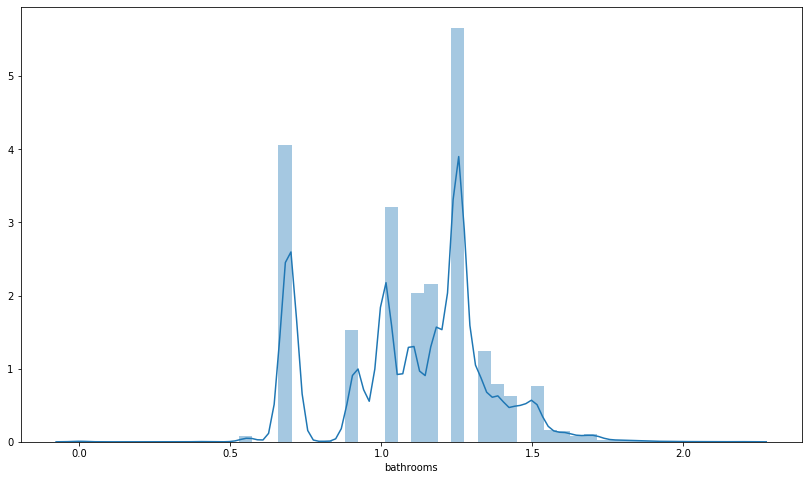

In [67]:
sns.distplot(np.log(pd_df['bathrooms']+1))

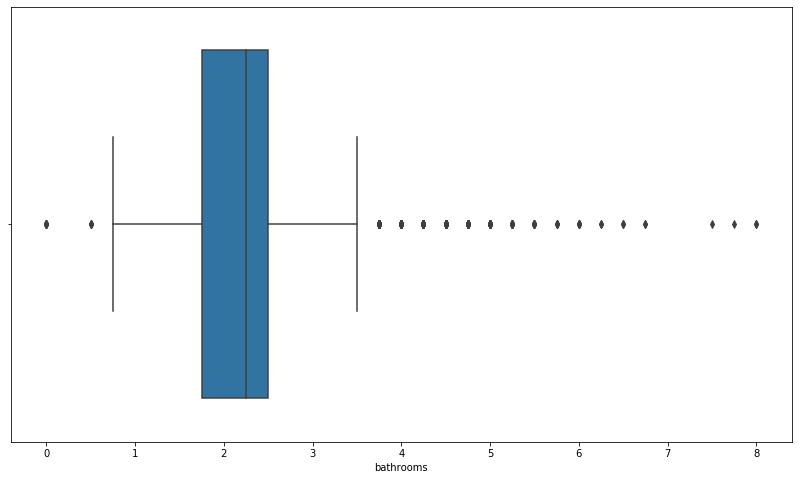

In [68]:
sns.boxplot(pd_df['bathrooms'])

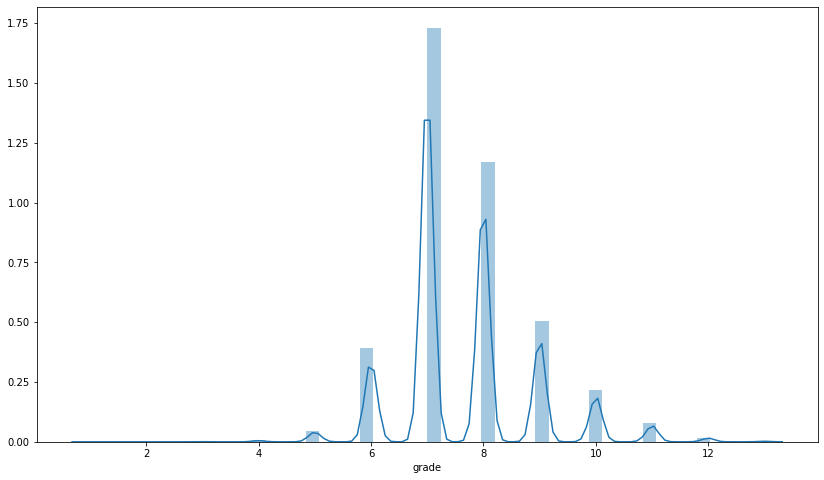

In [69]:
sns.distplot(pd_df['grade'])

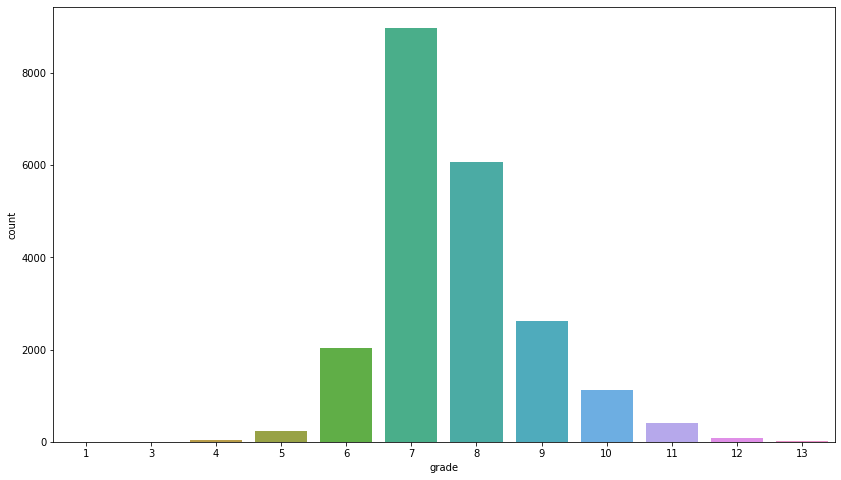

In [70]:
sns.countplot(pd_df['grade'])

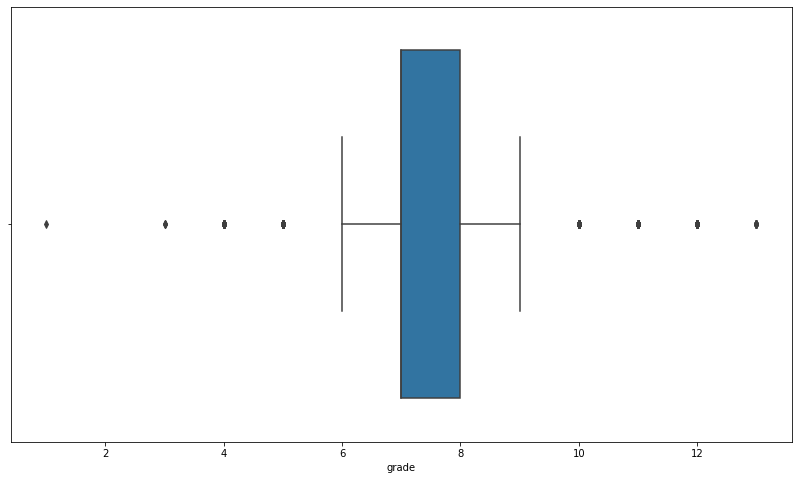

In [71]:
sns.boxplot(pd_df['grade'])

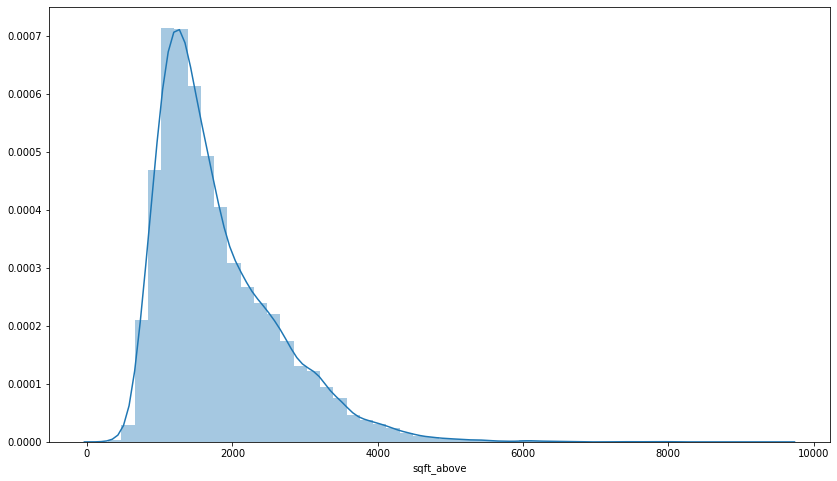

In [72]:
sns.distplot(pd_df['sqft_above'])

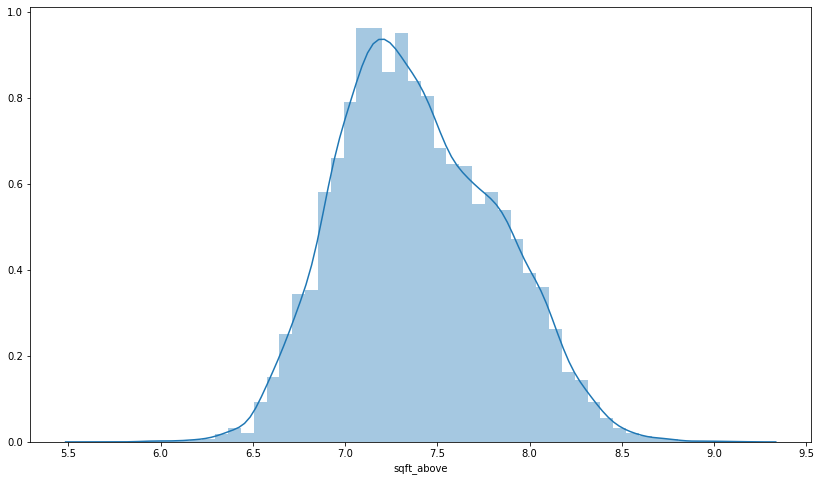

In [73]:
sns.distplot(np.log(pd_df['sqft_above']))

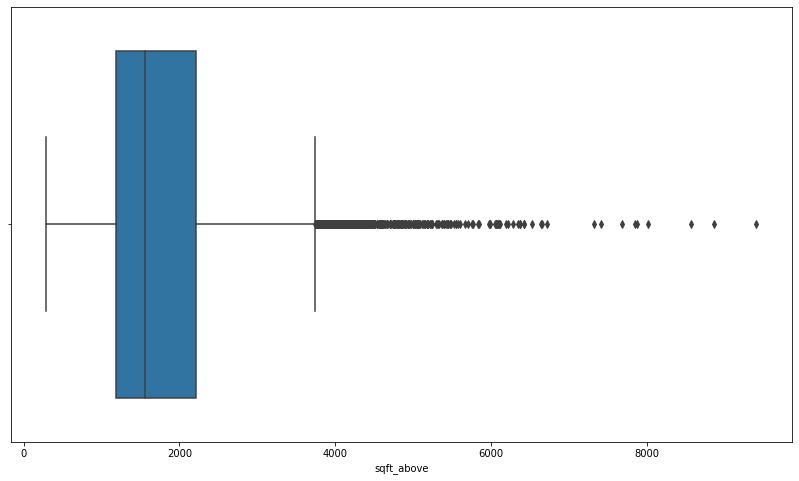

In [74]:
sns.boxplot(pd_df['sqft_above'])

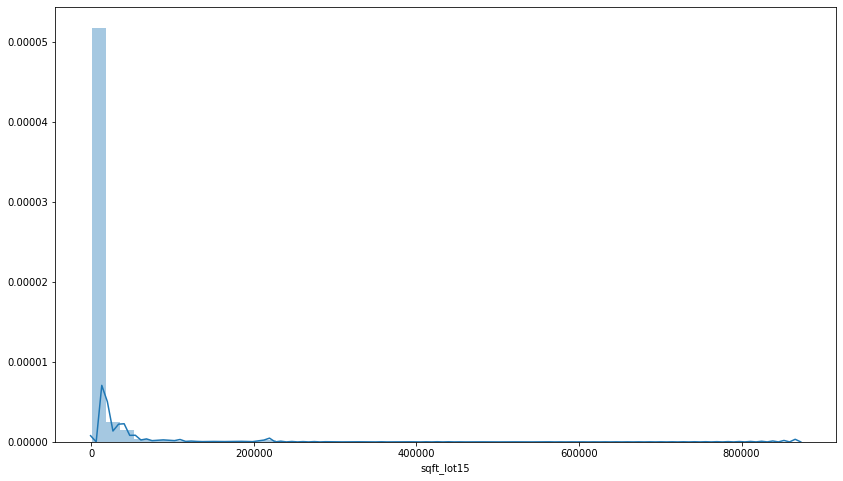

In [77]:
sns.distplot(pd_df['sqft_lot15'])

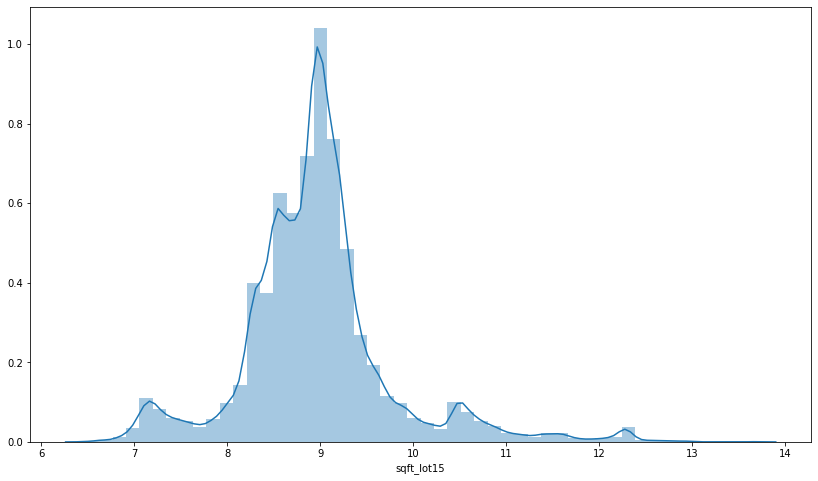

In [78]:
sns.distplot(np.log(pd_df['sqft_lot15']+1))

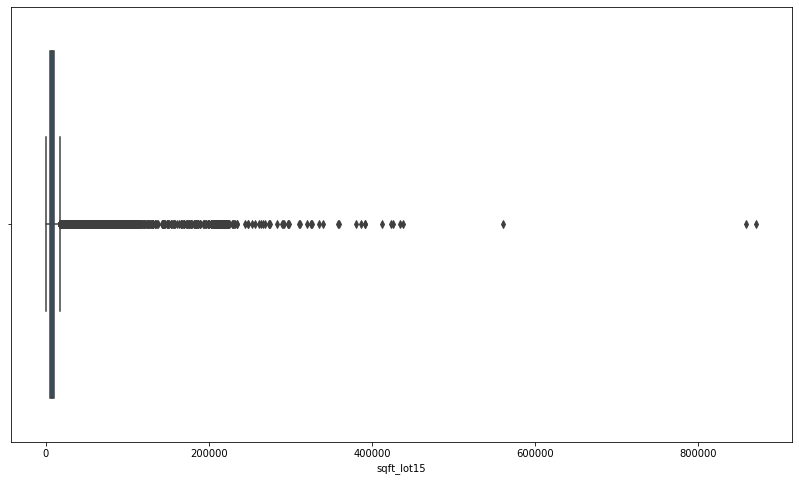

In [79]:
sns.boxplot(pd_df['sqft_lot15'])

In [82]:
pd_df['price'] = pd_df['price'].astype(float)


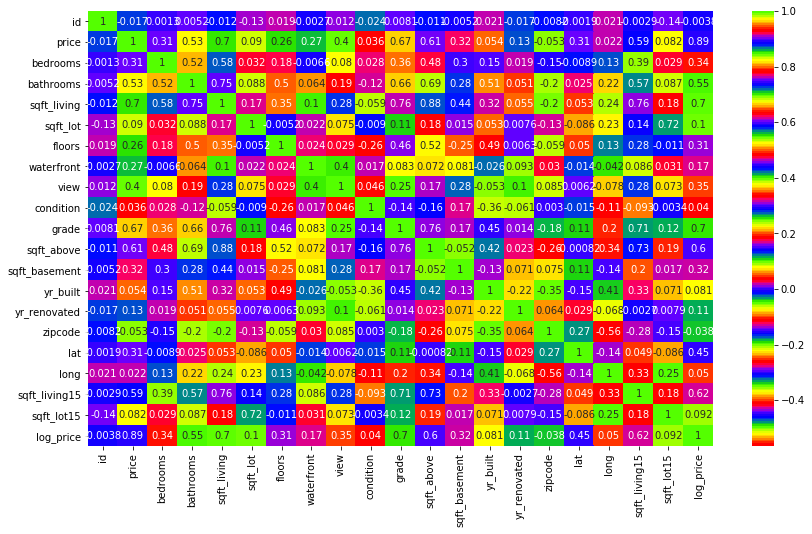

In [95]:

sns.heatmap(pd_df.corr(), annot=True, cmap = 'prism')

In [97]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [98]:
pd_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [106]:
pd_df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [112]:
pd_df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

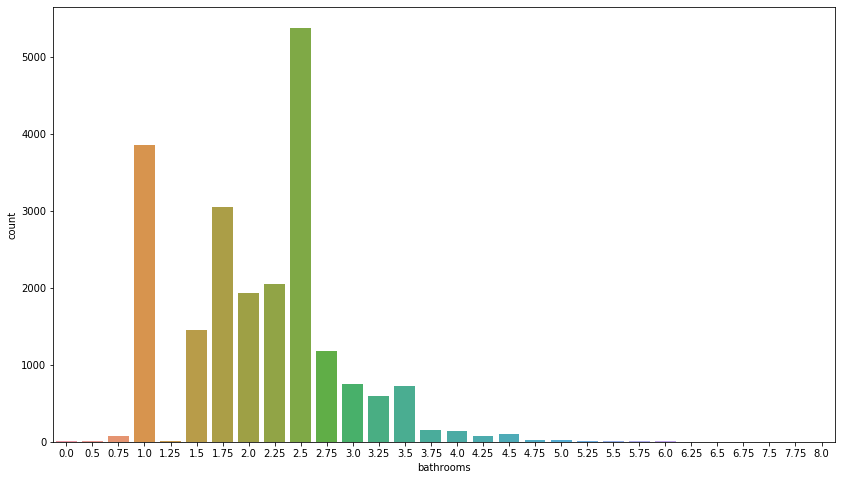

In [113]:
sns.countplot(pd_df['bathrooms'])

In [107]:
pd_df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [114]:
pd_df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

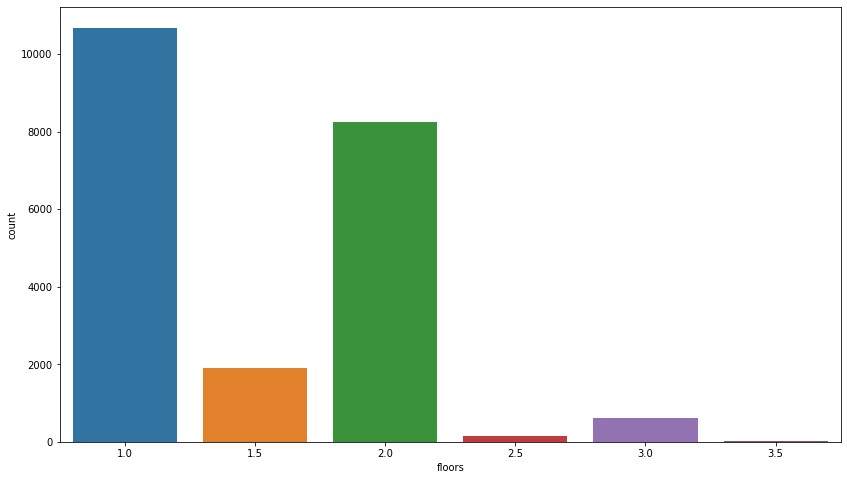

In [115]:
sns.countplot(pd_df['floors'])

In [116]:
pd_df['waterfront'].unique()

array([0, 1], dtype=int32)

In [117]:
pd_df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

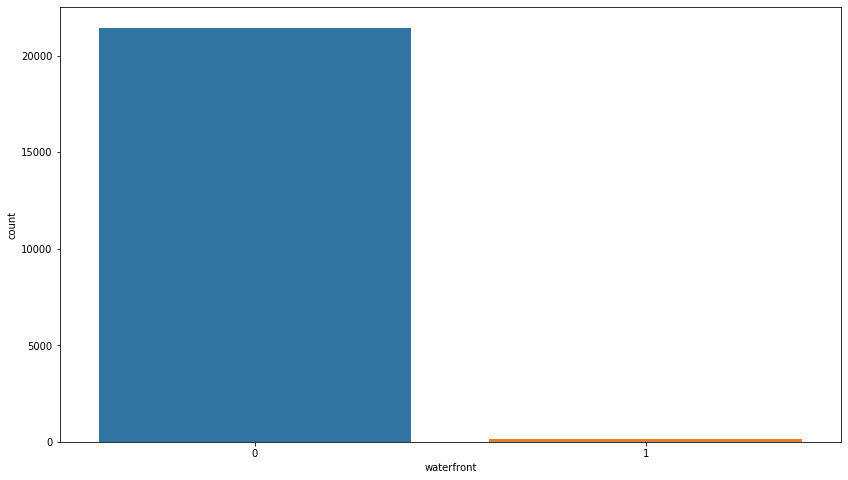

In [118]:
sns.countplot(pd_df['waterfront'])

In [122]:
pd_df.groupby('bathrooms')['price'].min()

bathrooms
0.00      75000.0
0.50     109000.0
0.75      80000.0
1.00      78000.0
1.25     275000.0
1.50     107000.0
1.75     115000.0
2.00     115000.0
2.25     160000.0
2.50     153503.0
2.75     183750.0
3.00     154000.0
3.25     176000.0
3.50     216650.0
3.75     255000.0
4.00     265000.0
4.25     490000.0
4.50     290000.0
4.75     480000.0
5.00     343000.0
5.25     300000.0
5.50     925000.0
5.75     540000.0
6.00     900000.0
6.25    2888000.0
6.50    1180000.0
6.75     800000.0
7.50     450000.0
7.75    6885000.0
8.00    2280000.0
Name: price, dtype: float64

In [124]:
pd_df.groupby('bathrooms')['price'].max()

bathrooms
0.00    1295650.0
0.50     312500.0
0.75     785000.0
1.00    1300000.0
1.25    1388000.0
1.50    1500000.0
1.75    3278000.0
2.00    2200000.0
2.25    2400000.0
2.50    3070000.0
2.75    2700000.0
3.00    4489000.0
3.25    3640900.0
3.50    3710000.0
3.75    3650000.0
4.00    3400000.0
4.25    3850000.0
4.50    7062500.0
4.75    3650000.0
5.00    5350000.0
5.25    5110800.0
5.50    4500000.0
5.75    5570000.0
6.00    5300000.0
6.25    3300000.0
6.50    2238890.0
6.75    4668000.0
7.50     450000.0
7.75    6885000.0
8.00    7700000.0
Name: price, dtype: float64

In [125]:
pd_df.groupby('floors')['price'].min()

floors
1.0     75000.0
1.5     92000.0
2.0     90000.0
2.5    255000.0
3.0    205000.0
3.5    435000.0
Name: price, dtype: float64

In [127]:
pd_df.groupby('floors')['price'].max()

floors
1.0    4668000.0
1.5    3650000.0
2.0    7062500.0
2.5    7700000.0
3.0    3100000.0
3.5    3300000.0
Name: price, dtype: float64

In [130]:
pd_df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int32)

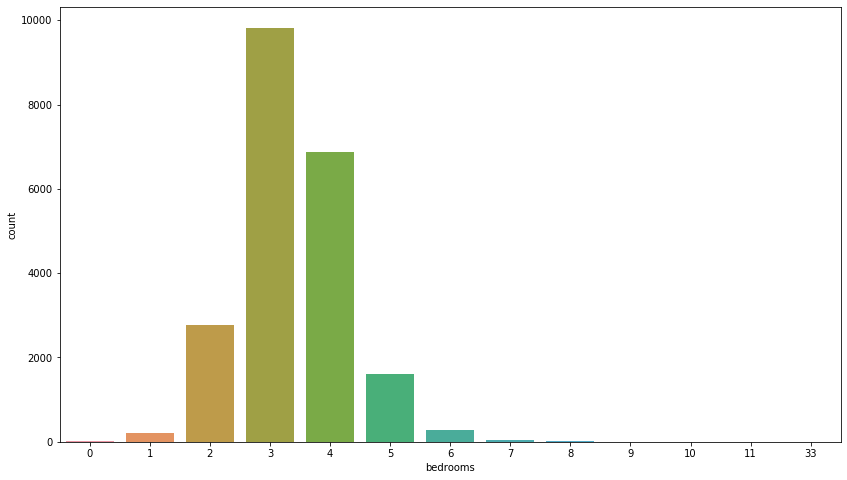

In [131]:
sns.countplot(pd_df['bedrooms'])

In [132]:
pd_df['bedrooms'].value_counts()


3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [133]:
pd_df.groupby('bedrooms')['price'].min()

bedrooms
0     139950.0
1      75000.0
2      78000.0
3      82000.0
4     100000.0
5     133000.0
6     175000.0
7     280000.0
8     340000.0
9     450000.0
10    650000.0
11    520000.0
33    640000.0
Name: price, dtype: float64

In [134]:
pd_df.groupby('bedrooms')['price'].max()

bedrooms
0     1295650.0
1     1247000.0
2     3278000.0
3     3800000.0
4     4489000.0
5     7062500.0
6     7700000.0
7     3200000.0
8     3300000.0
9     1400000.0
10    1148000.0
11     520000.0
33     640000.0
Name: price, dtype: float64

In [136]:
type(data)

pyspark.sql.dataframe.DataFrame

In [138]:
data.select(min('price')).show()

+----------+
|min(price)|
+----------+
|     75000|
+----------+



In [139]:
data.select(max('price')).show()

+----------+
|max(price)|
+----------+
|   7700000|
+----------+



In [141]:
data.printSchema()

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



In [143]:
data = data.withColumn('date', to_date('date'))

In [145]:
data = data.drop('date')

In [146]:
data.show()

+----------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520| 221900|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192| 538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    1951|        1991|  98125| 47.721|-122.319|         1690|      7639|
|5631500400| 18

In [147]:
data.printSchema()

root
 |-- id: long (nullable = true)
 |-- price: decimal(7,0) (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: integer (nullable = true)
 |-- sqft_basement: integer (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: integer (nullable = true)
 |-- sqft_lot15: integer (nullable = true)



In [165]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [163]:
data.withColumn('price', data.price.cast('bigint'))

data.withColumn('log_price', log('price'))

DataFrame[id: bigint, price: decimal(7,0), bedrooms: int, bathrooms: double, sqft_living: int, sqft_lot: int, floors: double, waterfront: int, view: int, condition: int, grade: int, sqft_above: int, sqft_basement: int, yr_built: int, yr_renovated: int, zipcode: int, lat: double, long: double, sqft_living15: int, sqft_lot15: int, log_price: double]

In [169]:
features  = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long','sqft_living15', 'sqft_lot15']

In [172]:
VA_vect = VectorAssembler(inputCols = features, outputCol = 'features_of_model')

In [176]:
final_df = VA_vect.transform(data)


final_df.show()

+----------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+--------------------+
|        id|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|   features_of_model|
+----------+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+--------------------+
|7129300520| 221900|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|[3.0,1.0,1180.0,5...|
|6414100192| 538000|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|      2170|          400|    

In [200]:
final_df = final_df.withColumn('label', log('price'))

In [201]:
train,test = final_df.randomSplit([0.8,0.2], seed = 15)

In [202]:
print("dim of Final_df Data Set :", (final_df.count(), len(final_df.columns)))
print("dim of Training data Set :", (train.count(), len(train.columns)))
print("dim of Testing Data Set  :", (test.count(), len(test.columns)))

dim of Final_df Data Set : (21613, 22)
dim of Training data Set : (17396, 22)
dim of Testing Data Set  : (4217, 22)


In [203]:
train.columns

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'features_of_model',
 'label']

In [204]:
lr_model = LinearRegression(featuresCol = 'features_of_model', labelCol = 'label')

In [209]:
model = lr_model.fit(train)

In [210]:
train.withColumn('pred_label',model.transform(train))

AssertionError: col should be Column

In [212]:
pred_train = model.transform(train)

In [213]:
pred_test = model.transform(test)

In [216]:
from pyspark.ml.evaluation import RegressionEvaluator

In [217]:
pred_train.show()

+--------+------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+--------------------+------------------+------------------+
|      id| price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|   features_of_model|             label|        prediction|
+--------+------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+--------------------+------------------+------------------+
| 1200019|647500|       4|     1.75|       2060|   26036|   1.0|         0|   0|        4|    8|      1160|          900|    1947|           0|  98166|47.4444|-122.351|         2590|     21891|[4.0,1.75,2060.0,...| 13.38087407255583|13.00259

In [218]:
pred_train.select('features_of_model','price','label','prediction').show()

+--------------------+------+------------------+------------------+
|   features_of_model| price|             label|        prediction|
+--------------------+------+------------------+------------------+
|[4.0,1.75,2060.0,...|647500| 13.38087407255583|13.002594906746298|
|[3.0,1.0,1460.0,4...|400000| 12.89921982609012|12.605169947111163|
|[4.0,2.0,1650.0,3...|402500|12.905450375840756|12.885265224905945|
|[4.0,2.75,2220.0,...|680000| 13.42984807715229|13.073434151637708|
|[4.0,2.5,2540.0,5...|487000|13.096019402064726|13.221219054362153|
|[3.0,1.0,1340.0,2...|281000|12.546109948315882|12.303661368845487|
|[4.0,2.0,1980.0,1...|239000|12.384218830913648|12.653560154520532|
|[2.0,1.0,840.0,12...|150000|11.918390573078392|12.483050782474008|
|[2.0,1.0,840.0,12...|175000|12.072541252905651|12.483050782474008|
|[2.0,1.0,790.0,52...|299800|12.610870864650634|12.568454170806339|
|[3.0,2.0,1410.0,2...|520000| 13.16158409055761|13.154048303890152|
|[3.0,2.25,1530.0,...|465000|13.049792684569493|

In [219]:
pred_test.select('features_of_model','price','label','prediction').show()

+--------------------+------+------------------+------------------+
|   features_of_model| price|             label|        prediction|
+--------------------+------+------------------+------------------+
|[6.0,3.0,2400.0,9...|280000|12.542544882151386|12.666672071930131|
|[6.0,3.0,2400.0,9...|300000|12.611537753638338|12.666672071930131|
|[3.0,1.0,1430.0,7...|235000|12.367340793126296| 12.55094731141479|
|[5.0,1.5,1990.0,1...|178000|12.089538829274222|12.668182823999993|
|[3.0,3.5,3190.0,1...|795000| 13.58609739363647| 13.88747286822449|
|[4.0,2.75,3130.0,...|835000|13.635187003832993|13.586129696807943|
|[4.0,2.75,3010.0,...|810000|13.604789526648622|13.618845849503272|
|[3.0,1.5,1640.0,7...|295000|12.594730635321957|12.983380988301429|
|[3.0,1.5,1070.0,6...|219950|12.301155526776865|12.079652929978488|
|[2.0,1.0,1100.0,4...|343566|12.747134511926056|12.597403626140087|
|[2.0,1.75,1290.0,...|573300|13.259164418896473|12.922118079801917|
|[2.0,1.0,780.0,16...| 78000| 11.26446410567173|

In [226]:
pred_train = pred_train.withColumn('pred_price', round(exp('prediction'),2))

In [227]:
pred_test = pred_test.withColumn('pred_price', round(exp('prediction'),2))

In [228]:
pred_train.select('features_of_model','label','prediction','price','pred_price').show()

+--------------------+------------------+------------------+------+----------+
|   features_of_model|             label|        prediction| price|pred_price|
+--------------------+------------------+------------------+------+----------+
|[4.0,1.75,2060.0,...| 13.38087407255583|13.002594906746298|647500|  443562.9|
|[3.0,1.0,1460.0,4...| 12.89921982609012|12.605169947111163|400000| 298095.73|
|[4.0,2.0,1650.0,3...|12.905450375840756|12.885265224905945|402500| 394456.93|
|[4.0,2.75,2220.0,...| 13.42984807715229|13.073434151637708|680000| 476124.26|
|[4.0,2.5,2540.0,5...|13.096019402064726|13.221219054362153|487000| 551953.48|
|[3.0,1.0,1340.0,2...|12.546109948315882|12.303661368845487|281000| 220501.85|
|[4.0,2.0,1980.0,1...|12.384218830913648|12.653560154520532|239000| 312875.35|
|[2.0,1.0,840.0,12...|11.918390573078392|12.483050782474008|150000| 263827.51|
|[2.0,1.0,840.0,12...|12.072541252905651|12.483050782474008|175000| 263827.51|
|[2.0,1.0,790.0,52...|12.610870864650634|12.56845417

In [229]:
pred_test.select('features_of_model','label','prediction','price','pred_price').show()

+--------------------+------------------+------------------+------+----------+
|   features_of_model|             label|        prediction| price|pred_price|
+--------------------+------------------+------------------+------+----------+
|[6.0,3.0,2400.0,9...|12.542544882151386|12.666672071930131|280000| 317004.76|
|[6.0,3.0,2400.0,9...|12.611537753638338|12.666672071930131|300000| 317004.76|
|[3.0,1.0,1430.0,7...|12.367340793126296| 12.55094731141479|235000| 282362.59|
|[5.0,1.5,1990.0,1...|12.089538829274222|12.668182823999993|178000| 317484.04|
|[3.0,3.5,3190.0,1...| 13.58609739363647| 13.88747286822449|795000|1074614.84|
|[4.0,2.75,3130.0,...|13.635187003832993|13.586129696807943|835000| 795025.68|
|[4.0,2.75,3010.0,...|13.604789526648622|13.618845849503272|810000| 821466.02|
|[3.0,1.5,1640.0,7...|12.594730635321957|12.983380988301429|295000| 435121.68|
|[3.0,1.5,1070.0,6...|12.301155526776865|12.079652929978488|219950| 176248.98|
|[2.0,1.0,1100.0,4...|12.747134511926056|12.59740362

In [233]:
rmse_train = RegressionEvaluator(predictionCol = 'pred_price', labelCol = 'price', metricName = 'rmse')

In [234]:
rmse_train.evaluate(pred_train)

201519.88267596878

In [235]:
rmse_test = RegressionEvaluator(predictionCol = 'pred_price', labelCol = 'price', metricName = 'rmse')

rmse_test.evaluate(pred_test)

226812.38089030757

In [236]:
r2_train = RegressionEvaluator(predictionCol = 'pred_price', labelCol = 'price', metricName = 'r2')

r2_train.evaluate(pred_train)

0.6856061314617323

In [237]:
r2_test = RegressionEvaluator(predictionCol = 'pred_price', labelCol = 'price', metricName = 'r2')

r2_test.evaluate(pred_test)

0.6740773349689231

In [240]:
from pyspark.ml.regression import RandomForestRegressor

In [253]:
rfr_model = RandomForestRegressor(featuresCol = 'features_of_model', labelCol = 'price')

In [254]:
model_of_rfr = rfr_model.fit(train)

In [255]:
pred_train_rfr = model_of_rfr.transform(train)

In [256]:
pred_train_rfr.show()

+--------+------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+--------------------+------------------+------------------+
|      id| price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|   features_of_model|             label|        prediction|
+--------+------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+--------------------+------------------+------------------+
| 1200019|647500|       4|     1.75|       2060|   26036|   1.0|         0|   0|        4|    8|      1160|          900|    1947|           0|  98166|47.4444|-122.351|         2590|     21891|[4.0,1.75,2060.0,...| 13.38087407255583|496119.3

In [257]:
pred_test_rfr = model_of_rfr.transform(test)

In [258]:
pred_test_rfr.show()

+--------+------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+--------------------+------------------+------------------+
|      id| price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|   features_of_model|             label|        prediction|
+--------+------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+--------------------+------------------+------------------+
| 1000102|280000|       6|      3.0|       2400|    9373|   2.0|         0|   0|        3|    7|      2400|            0|    1991|           0|  98002|47.3262|-122.214|         2060|      7316|[6.0,3.0,2400.0,9...|12.542544882151386| 394862.

In [259]:
pred_train_rfr.select('features_of_model','price','prediction').show()

+--------------------+------+------------------+
|   features_of_model| price|        prediction|
+--------------------+------+------------------+
|[4.0,1.75,2060.0,...|647500|496119.33938370564|
|[3.0,1.0,1460.0,4...|400000| 324848.8837628715|
|[4.0,2.0,1650.0,3...|402500| 464282.8140737858|
|[4.0,2.75,2220.0,...|680000|    532177.6917826|
|[4.0,2.5,2540.0,5...|487000| 769062.3072251764|
|[3.0,1.0,1340.0,2...|281000|262209.82996017265|
|[4.0,2.0,1980.0,1...|239000| 352265.8859745209|
|[2.0,1.0,840.0,12...|150000|259840.79912186257|
|[2.0,1.0,840.0,12...|175000|259840.79912186257|
|[2.0,1.0,790.0,52...|299800| 275189.3114515862|
|[3.0,2.0,1410.0,2...|520000| 473175.5645916212|
|[3.0,2.25,1530.0,...|465000| 636201.7411366578|
|[5.0,1.0,3020.0,4...|630000| 753213.6895677078|
|[2.0,2.0,1130.0,1...|411000| 616876.5987712819|
|[2.0,1.0,1420.0,4...|496000| 470779.8420437506|
|[3.0,2.5,1530.0,3...|570000|  501540.258817509|
|[3.0,2.5,1530.0,3...|546000|  501540.258817509|
|[3.0,2.5,1910.0,4..

In [260]:
pred_test_rfr.select('features_of_model','price','prediction').show()


+--------------------+------+------------------+
|   features_of_model| price|        prediction|
+--------------------+------+------------------+
|[6.0,3.0,2400.0,9...|280000| 394862.0956219776|
|[6.0,3.0,2400.0,9...|300000| 394862.0956219776|
|[3.0,1.0,1430.0,7...|235000|275499.36004437774|
|[5.0,1.5,1990.0,1...|178000| 365714.5470728717|
|[3.0,3.5,3190.0,1...|795000| 899131.3007825541|
|[4.0,2.75,3130.0,...|835000|  748590.208417641|
|[4.0,2.75,3010.0,...|810000| 736312.3347111918|
|[3.0,1.5,1640.0,7...|295000|326196.58181739296|
|[3.0,1.5,1070.0,6...|219950|259840.79912186257|
|[2.0,1.0,1100.0,4...|343566|306540.41562567966|
|[2.0,1.75,1290.0,...|573300| 458158.9169306593|
|[2.0,1.0,780.0,16...| 78000|284360.96421747364|
|[2.0,1.0,1500.0,1...|170000|373224.58116559876|
|[2.0,1.0,1110.0,2...|250000|  304537.588523749|
|[3.0,1.5,1970.0,1...|406500|351414.79832022975|
|[5.0,4.5,4440.0,9...|600000| 1347827.545228596|
|[3.0,3.5,1650.0,1...|495000| 471347.1774197384|
|[3.0,2.75,2600.0,..

In [261]:
pred_train_rfr = pred_train_rfr.withColumn('prediction', round('prediction',2))

pred_test_rfr = pred_test_rfr.withColumn('prediction', round('prediction',2))

In [262]:
pred_train_rfr.select('features_of_model','price','prediction').show()

+--------------------+------+----------+
|   features_of_model| price|prediction|
+--------------------+------+----------+
|[4.0,1.75,2060.0,...|647500| 496119.34|
|[3.0,1.0,1460.0,4...|400000| 324848.88|
|[4.0,2.0,1650.0,3...|402500| 464282.81|
|[4.0,2.75,2220.0,...|680000| 532177.69|
|[4.0,2.5,2540.0,5...|487000| 769062.31|
|[3.0,1.0,1340.0,2...|281000| 262209.83|
|[4.0,2.0,1980.0,1...|239000| 352265.89|
|[2.0,1.0,840.0,12...|150000|  259840.8|
|[2.0,1.0,840.0,12...|175000|  259840.8|
|[2.0,1.0,790.0,52...|299800| 275189.31|
|[3.0,2.0,1410.0,2...|520000| 473175.56|
|[3.0,2.25,1530.0,...|465000| 636201.74|
|[5.0,1.0,3020.0,4...|630000| 753213.69|
|[2.0,2.0,1130.0,1...|411000|  616876.6|
|[2.0,1.0,1420.0,4...|496000| 470779.84|
|[3.0,2.5,1530.0,3...|570000| 501540.26|
|[3.0,2.5,1530.0,3...|546000| 501540.26|
|[3.0,2.5,1910.0,4...|617000| 546858.78|
|[3.0,2.5,3350.0,4...|635000| 763256.86|
|[3.0,2.5,2870.0,1...|872750| 735485.85|
+--------------------+------+----------+
only showing top

In [263]:
pred_test_rfr.select('features_of_model','price','prediction').show()


+--------------------+------+----------+
|   features_of_model| price|prediction|
+--------------------+------+----------+
|[6.0,3.0,2400.0,9...|280000|  394862.1|
|[6.0,3.0,2400.0,9...|300000|  394862.1|
|[3.0,1.0,1430.0,7...|235000| 275499.36|
|[5.0,1.5,1990.0,1...|178000| 365714.55|
|[3.0,3.5,3190.0,1...|795000|  899131.3|
|[4.0,2.75,3130.0,...|835000| 748590.21|
|[4.0,2.75,3010.0,...|810000| 736312.33|
|[3.0,1.5,1640.0,7...|295000| 326196.58|
|[3.0,1.5,1070.0,6...|219950|  259840.8|
|[2.0,1.0,1100.0,4...|343566| 306540.42|
|[2.0,1.75,1290.0,...|573300| 458158.92|
|[2.0,1.0,780.0,16...| 78000| 284360.96|
|[2.0,1.0,1500.0,1...|170000| 373224.58|
|[2.0,1.0,1110.0,2...|250000| 304537.59|
|[3.0,1.5,1970.0,1...|406500|  351414.8|
|[5.0,4.5,4440.0,9...|600000|1347827.55|
|[3.0,3.5,1650.0,1...|495000| 471347.18|
|[3.0,2.75,2600.0,...|805000| 678045.39|
|[3.0,1.0,1480.0,6...|398000| 394717.14|
|[4.0,1.75,1680.0,...|275000| 335671.35|
+--------------------+------+----------+
only showing top

In [264]:
rmse_train_rfr = RegressionEvaluator(predictionCol = 'prediction', labelCol = 'price', metricName = 'rmse')

rmse_train_rfr.evaluate(pred_train_rfr)

167864.42210726958

In [265]:
rmse_test_rfr = RegressionEvaluator(predictionCol = 'prediction', labelCol = 'price', metricName = 'rmse')

rmse_test_rfr.evaluate(pred_test_rfr)

199859.9206580623

In [266]:
r2_train_rfr = RegressionEvaluator(predictionCol = 'prediction', labelCol = 'price', metricName = 'r2')

r2_train_rfr.evaluate(pred_train_rfr)

0.7818498159578235

In [267]:
r2_test_rfr = RegressionEvaluator(predictionCol = 'prediction', labelCol = 'price', metricName = 'r2')

r2_test_rfr.evaluate(pred_test_rfr)

0.7469347758082543